# Data import and check

In [54]:
# Uploading our dataset in the notebook
# Importing requaierd libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('model.csv')

In [55]:
#A quick overview on our dataset
df

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


Target
0    69878
1    32473
dtype: int64


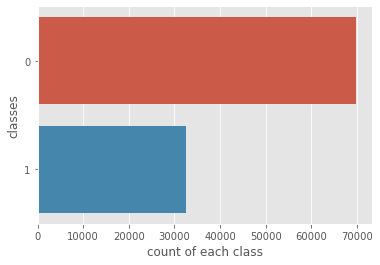

In [56]:
#We use pandas function "groupby" to overview the frequency of target output, in the case of unbalanced data, we may need to downsample or upsample the data
print(df.groupby('Target').size())
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.Target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [57]:
#Regarding the previuos graph, the gap between '0' and '1' are not that much, so there is no need for down or upsampling!!!
#Now we can check the dataset as a whole, with the main aim of the detection of null values
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102351 entries, 0 to 102350
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    102351 non-null  int64 
 1   Gender                102351 non-null  object
 2   Age                   102351 non-null  int64 
 3   Driving_License       102351 non-null  int64 
 4   Licence_Type          97260 non-null   object
 5   Region_Code           102351 non-null  int64 
 6   Previously_Insured    102351 non-null  object
 7   Vehicle_Age           102351 non-null  object
 8   Vehicle_Damage        102351 non-null  object
 9   Annual_Premium        102351 non-null  int64 
 10  Policy_Sales_Channel  102351 non-null  int64 
 11  Seniority             102351 non-null  int64 
 12  Target                102351 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 10.2+ MB


In [58]:
## There are some null values in the column "Licence_Type", now count them
##Checking for the number of the null values in the rows
df.isna().sum()

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

# Categorical Attributes

In [59]:
#We attribute a different value 'N' to null values in the dataset, to be able to investigate it in terms of its effect on the target value
df['Licence_Type']=df['Licence_Type'].fillna('N')

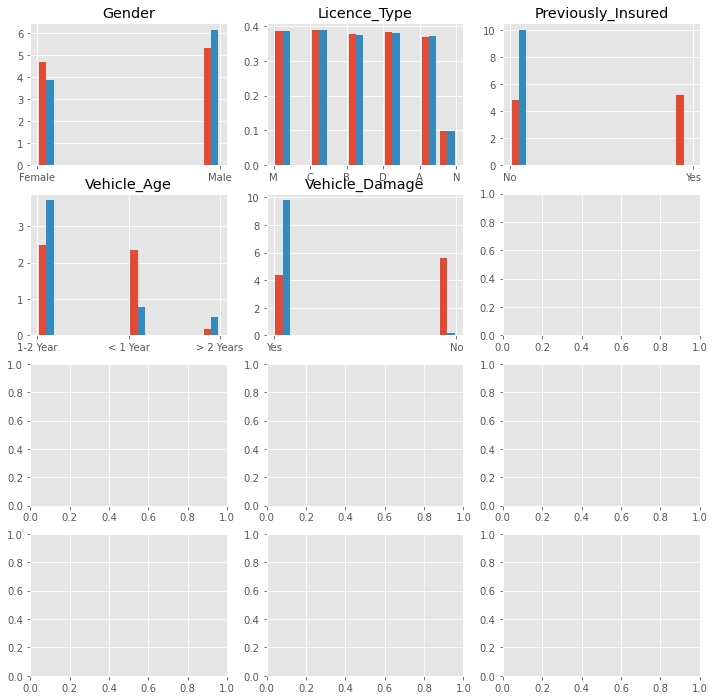

In [60]:
#plotting the relation of the categorical data on the "target value"
df_categorical=df.select_dtypes(include=['object'])
df_0=df_categorical[df['Target']==0] # records wih target==1
df_1=df_categorical[df['Target']==1] # records wih target==0

fig, axes = plt.subplots(4, 3,figsize=[12,12])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [61]:
#The Previuos graph shows that "Licence type" does not have any strong correlation with the "target" value----So we can drop it
#Ubviously, column "id" does not have any statistical value, so we can omit it as well!!
#We save the cleaned data in a nw dataset "df2", not to loose original values
df2=df.drop(['Licence_Type' , 'id'],axis='columns')
df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,Female,44,1,30,No,1-2 Year,Yes,25741,154,152,0
1,Male,23,1,3,Yes,< 1 Year,No,2630,152,256,0
2,Male,43,1,28,No,1-2 Year,Yes,70720,52,224,0
3,Male,60,1,28,Yes,1-2 Year,No,48512,26,86,0
4,Female,42,1,46,No,1-2 Year,Yes,32169,124,132,0


In [62]:
#Defining dummy values for the categorical data
cleanup_nums = {"Gender": {"Female": 0, "Male": 1},
               "Previously_Insured": {"No": 0, "Yes": 1},
               "Vehicle_Damage": {"No": 0, "Yes": 1},
               "Vehicle_Age": {"1-2 Year": 0, "< 1 Year": 1, "> 2 Years": 2},
               } 
             

In [63]:
#A quick review of our dataset
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102351 entries, 0 to 102350
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                102351 non-null  object
 1   Age                   102351 non-null  int64 
 2   Driving_License       102351 non-null  int64 
 3   Region_Code           102351 non-null  int64 
 4   Previously_Insured    102351 non-null  object
 5   Vehicle_Age           102351 non-null  object
 6   Vehicle_Damage        102351 non-null  object
 7   Annual_Premium        102351 non-null  int64 
 8   Policy_Sales_Channel  102351 non-null  int64 
 9   Seniority             102351 non-null  int64 
 10  Target                102351 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 8.6+ MB


In [64]:
#Taking "categorical" values from our dataset
df2_categorical=df2.select_dtypes(include=['object'])
df2_categorical.head()
#Replacing dummy values in our dataset
df2_categorical=df2_categorical.replace(cleanup_nums)
df2_categorical.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,0,0,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,0,0
4,0,0,0,1


# Numerical Attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8030E33D0>,
      dtype=object)

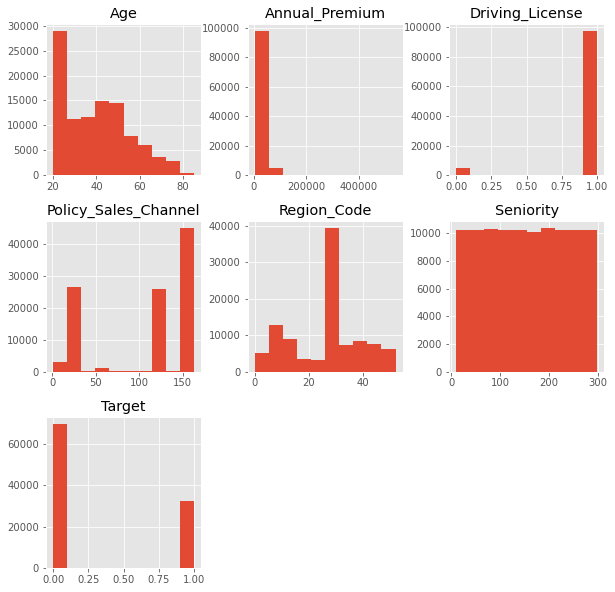

In [65]:
#Taking "numerical" values from our dataset
df2_numerical=df2.select_dtypes(include=['int64'])
#Plotting numerical values histogram
df2_numerical.hist(figsize=(10,10))


In [66]:
df2_numerical.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Seniority', 'Target'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F802F55670>,
      dtype=object)

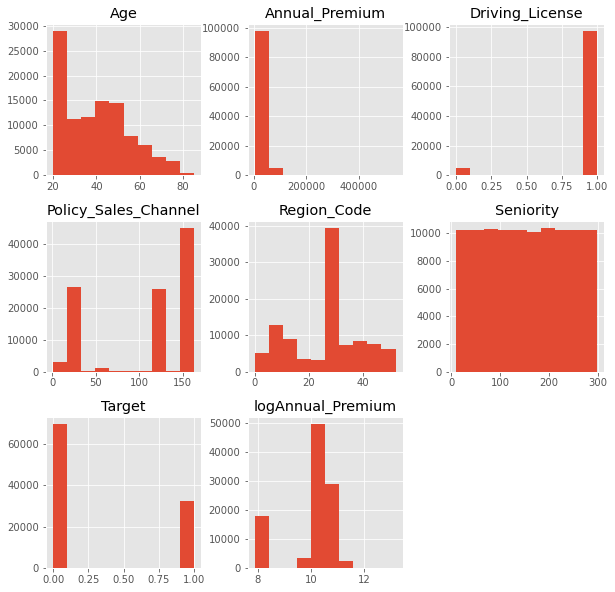

In [67]:
#The column "Annual_Premium" represents an unbalanced distribution, so we take a log from it
import math
pd.options.mode.chained_assignment = None
df2_numerical['logAnnual_Premium']=df2_numerical['Annual_Premium'].apply(lambda x: math.log(x+1))
df2_numerical.hist(figsize=(10,10))

C:\Users\Mostafa FA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Mostafa FA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


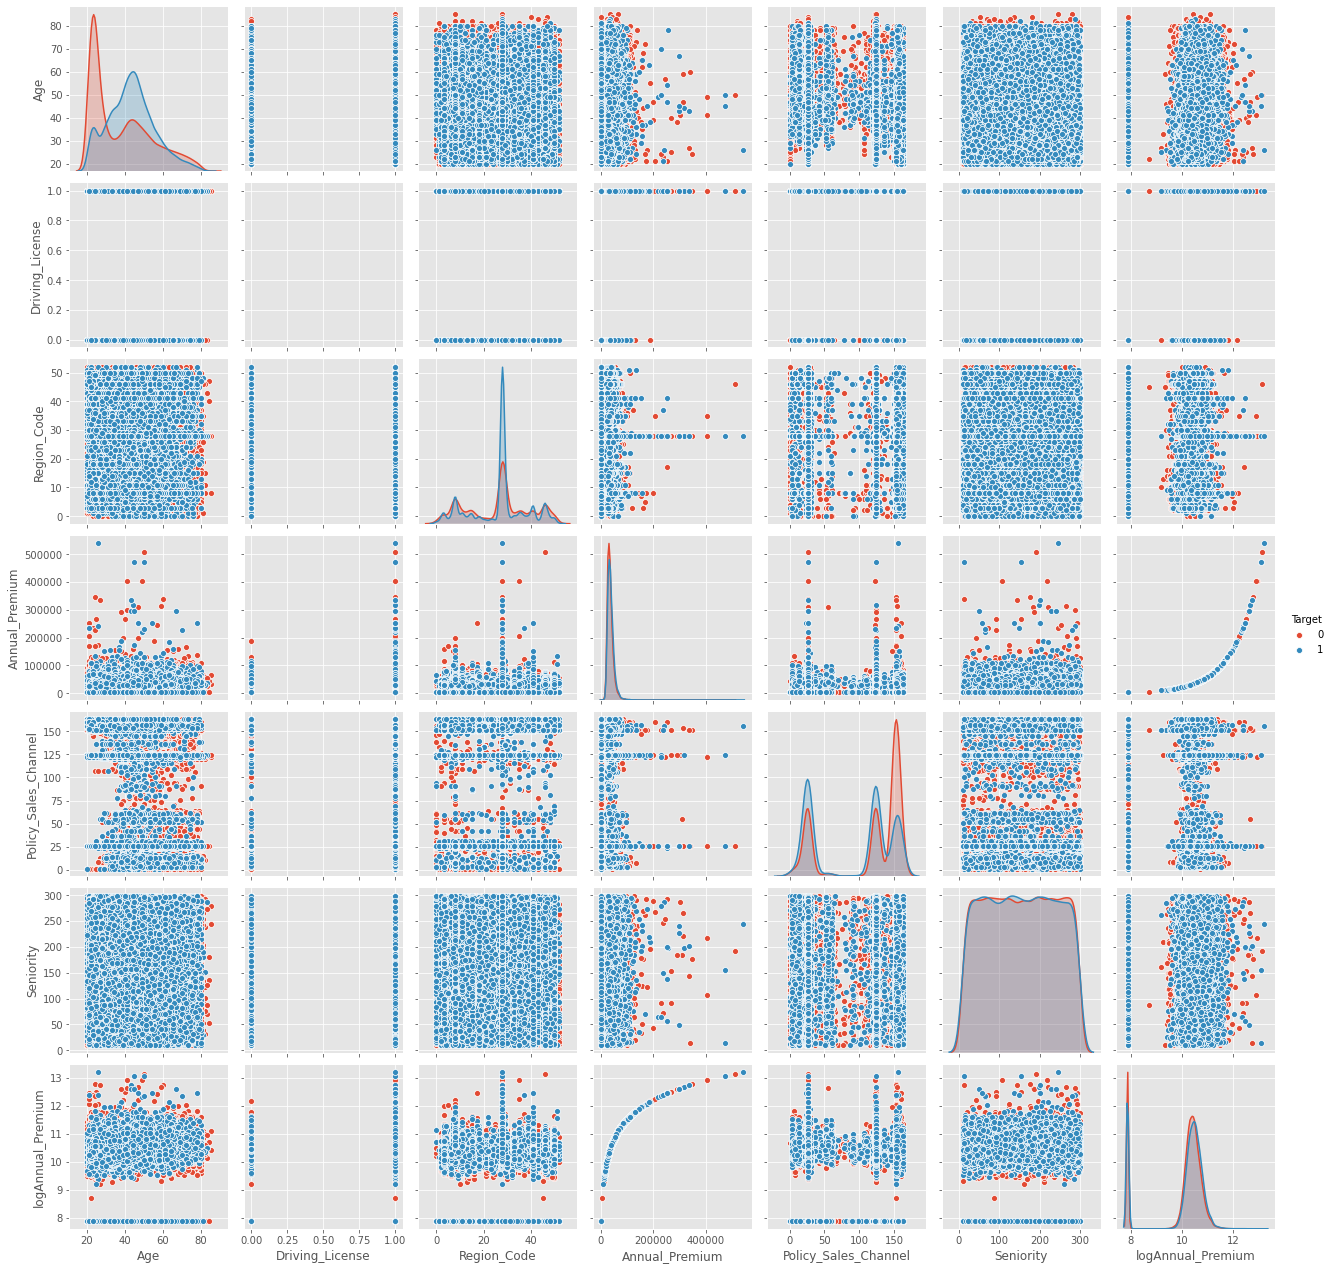

In [68]:
#Plotting the relation of each pair of values with the target value
sns.pairplot(df2_numerical[[ 'Age', 'Driving_License', 'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Seniority','logAnnual_Premium', 'Target']],hue='Target')

In [69]:
#Dropping 'Annual_Premium' from the dataset
df2_numerical=df2_numerical.drop(['Annual_Premium','Target'],axis='columns')

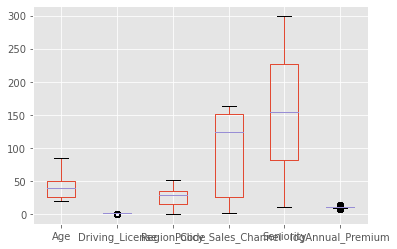

In [70]:
#Graphiccally representing the numerical data using box plot
import numpy as np
df2_numerical.boxplot()

# Scaler

In [71]:
#scaling the numerical data
#the scaler with be used for the nextt data as well
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df2_numerical)
scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

scaled_df2.head()

,Age,Driving_License,Region_Code,Policy_Sales_Channel,Seniority,logAnnual_Premium
0,0.276696,0.228789,0.269672,0.842122,-0.030179,0.139553
1,-1.129329,0.228789,-1.822571,0.805973,1.211837,-2.106606
2,0.209743,0.228789,0.114691,-1.001462,0.829678,1.134839
3,1.347954,0.228789,0.114691,-1.471395,-0.818382,0.763646
4,0.142789,0.228789,1.509519,0.299891,-0.269028,0.359081


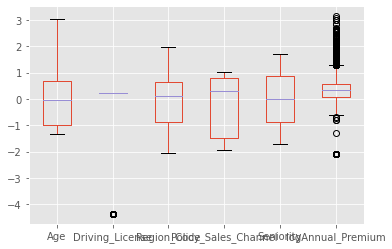

In [72]:
#plotting the scaled data
scaled_df2.boxplot()

In [73]:
#cheking again the categorical data
df2_categorical.tail()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage
102346,0,1,1,0
102347,0,0,0,1
102348,1,0,2,1
102349,0,1,1,0
102350,1,0,0,1


In [118]:
#combaining the numerical and categorical dataa in a same dataset
X=pd.concat([df2_categorical,scaled_df2], axis = 1)
X.tail()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Age,Driving_License,Region_Code,Policy_Sales_Channel,Seniority,logAnnual_Premium
102346,0,1,1,0,-0.995422,0.228789,0.424653,0.805973,-0.257086,0.433524
102347,0,0,0,1,0.477557,0.228789,0.114691,-1.471395,-0.483993,0.308679
102348,1,0,2,1,2.151397,0.228789,-1.435119,0.299891,-0.746727,0.847880
102349,0,1,1,0,-0.995422,0.228789,-1.202647,0.805973,-0.328741,0.162318
102350,1,0,0,1,2.017490,0.228789,0.114691,0.263743,-1.164713,-2.106606


In [100]:
#defining "y" as the "Target values"
y=df2['Target']
y.shape

(102351,)

# Sparsing 

In [101]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123
                                                    ) #fix random seed for replicability

print(X_train.shape, X_test.shape, y_train.shape , y_test.shape)

(71645, 10) (30706, 10) (71645,) (30706,)


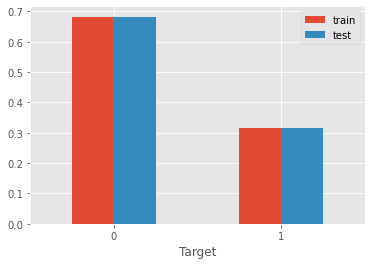

In [102]:
#Plotting the the size of '0' and '1' the the train and test set
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size
train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the label

# Applying PCA

In [25]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(X))

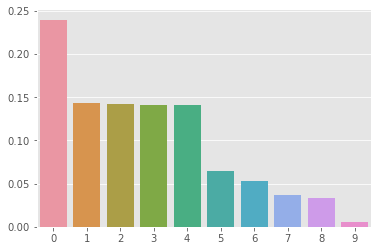

In [26]:
#Plotting eigen values 
explained_variance=pd.DataFrame(pca.explained_variance_ratio_)
%matplotlib inline
#Plotting pca's
import seaborn as sns
ax = sns.barplot( data=explained_variance.transpose())


# Prediction

In [103]:
#Importing the required libs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [104]:
#Defining a search funcion for the model with the best f1-score
def hyperp_search(classifier, parameters):
    # GridSearchCV to find the best carachteristics fitting to the model
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [105]:
#Defining roc funtion to plot the roc curve of a defined model
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

In [30]:
# Applying KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
#Defining 10 different number of neighbors starting from 10, increasing with 100 steps till 1000. 
parameters = {'n_neighbors':np.arange(10,1000,100)}
#Applying hyperp_search for KNN
hyperp_search(classifier,parameters)

f1_train: 0.653830 using {'n_neighbors': 110}
f1_test:  0.6542301382704477
[[16350  4614]
 [ 2763  6979]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     20964
           1       0.60      0.72      0.65      9742

    accuracy                           0.76     30706
   macro avg       0.73      0.75      0.74     30706
weighted avg       0.78      0.76      0.76     30706



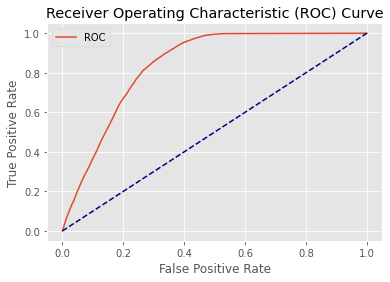

AUC: 0.84


In [32]:
#Defining knn_model with the best number of neighbors
model_knn = KNeighborsClassifier(n_neighbors=110)
#Using roc funtion to plot the model_KNN
fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [33]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations
model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))
print("f1_test: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.684046105784768
f1_test:  0.684046105784768
[[12382  8582]
 [  217  9525]]
              precision    recall  f1-score   support

           0       0.98      0.59      0.74     20964
           1       0.53      0.98      0.68      9742

    accuracy                           0.71     30706
   macro avg       0.75      0.78      0.71     30706
weighted avg       0.84      0.71      0.72     30706



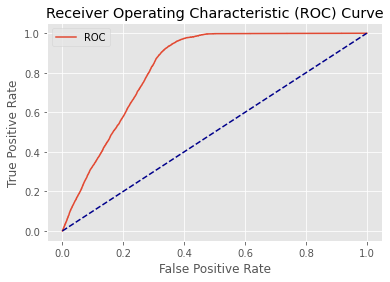

AUC: 0.83


In [34]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

In [35]:
#Applying LogisticRegression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }

hyperp_search(classifier,parameters)

f1_train: 0.622140 using {'C': 10, 'max_iter': 1000}
f1_test:  0.6219384351472409
[[16246  4718]
 [ 3216  6526]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     20964
           1       0.58      0.67      0.62      9742

    accuracy                           0.74     30706
   macro avg       0.71      0.72      0.71     30706
weighted avg       0.75      0.74      0.75     30706



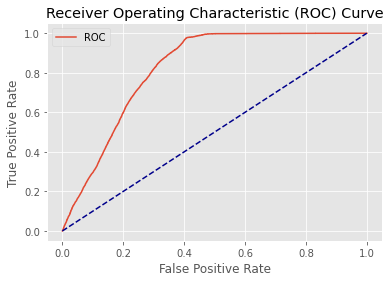

AUC: 0.82


In [36]:
#DEfining LogisticRegression with the best parameters
model = LogisticRegression(C=10, max_iter=1000)
fpr3,tpr3=fpr1,tpr1=roc(model,X_train,y_train,X_test,y_test)

In [106]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier()
parameters = {"n_estimators":[10,20,30,40], "criterion":['entropy','gini'], "max_depth":[15,10,20], "min_samples_split":[10], "min_samples_leaf":[4]}
hyperp_search(classifier,parameters)

f1_train: 0.684885 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 40}
f1_test:  0.6795189405882618
[[16048  4916]
 [ 2199  7543]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     20964
           1       0.61      0.77      0.68      9742

    accuracy                           0.77     30706
   macro avg       0.74      0.77      0.75     30706
weighted avg       0.79      0.77      0.77     30706



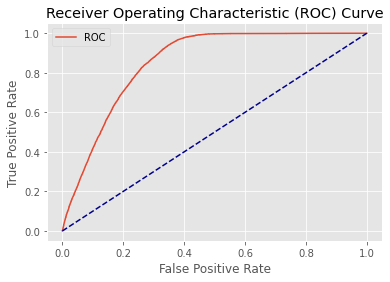

AUC: 0.85


In [107]:
model=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,min_samples_split= 10,n_estimators= 30)

fpr6,tpr6=roc(model,X_train,y_train,X_test,y_test)

In [39]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(20,10, 5),(100,20,5,4)],  "max_iter": [10000], "alpha": [0.0001,0.001,0.1,1]}
hyperp_search(classifier,parameters)

f1_train: 0.679549 using {'alpha': 0.1, 'hidden_layer_sizes': (100, 20, 5, 4), 'max_iter': 10000}
f1_test:  0.6649209763396614
[[16430  4534]
 [ 2632  7110]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     20964
           1       0.61      0.73      0.66      9742

    accuracy                           0.77     30706
   macro avg       0.74      0.76      0.74     30706
weighted avg       0.78      0.77      0.77     30706



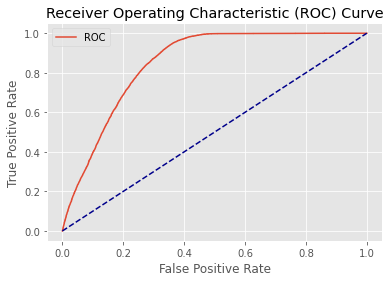

AUC: 0.85


In [40]:
model_MLP=MLPClassifier(hidden_layer_sizes=(20, 10, 5), alpha=0.0001, max_iter=10000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)


In [108]:
model=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,min_samples_split= 10,n_estimators= 30)
model.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=30)

In [109]:
#importing our test dataset
df_case = pd.read_csv('prediction_independent.csv')

In [110]:
df_case.head()

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority
0,1,Male,51,1,M,28,No,1-2 Year,Yes,45301,26,31
1,2,Male,63,1,B,39,No,1-2 Year,Yes,18609,124,28
2,3,Male,76,1,M,38,No,1-2 Year,Yes,35081,26,164
3,4,Female,38,1,B,41,No,1-2 Year,Yes,19603,124,33
4,5,Female,21,1,D,30,Yes,< 1 Year,No,27842,160,28


In [111]:
#Checking our dataset columns
df_case.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45196 entries, 0 to 45195
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    45196 non-null  int64 
 1   Gender                45196 non-null  object
 2   Age                   45196 non-null  int64 
 3   Driving_License       45196 non-null  int64 
 4   Licence_Type          42921 non-null  object
 5   Region_Code           45196 non-null  int64 
 6   Previously_Insured    45196 non-null  object
 7   Vehicle_Age           45196 non-null  object
 8   Vehicle_Damage        45196 non-null  object
 9   Annual_Premium        45196 non-null  int64 
 10  Policy_Sales_Channel  45196 non-null  int64 
 11  Seniority             45196 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.1+ MB


In [112]:
#A glance at train dataset to check the names
df_learn = pd.read_csv('model.csv')
df_learn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102351 entries, 0 to 102350
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    102351 non-null  int64 
 1   Gender                102351 non-null  object
 2   Age                   102351 non-null  int64 
 3   Driving_License       102351 non-null  int64 
 4   Licence_Type          97260 non-null   object
 5   Region_Code           102351 non-null  int64 
 6   Previously_Insured    102351 non-null  object
 7   Vehicle_Age           102351 non-null  object
 8   Vehicle_Damage        102351 non-null  object
 9   Annual_Premium        102351 non-null  int64 
 10  Policy_Sales_Channel  102351 non-null  int64 
 11  Seniority             102351 non-null  int64 
 12  Target                102351 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 10.2+ MB


In [113]:
#Removing not necessory columns
df_case2=df_case.drop(['Licence_Type' , 'id'],axis='columns')
df_case2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45196 entries, 0 to 45195
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                45196 non-null  object
 1   Age                   45196 non-null  int64 
 2   Driving_License       45196 non-null  int64 
 3   Region_Code           45196 non-null  int64 
 4   Previously_Insured    45196 non-null  object
 5   Vehicle_Age           45196 non-null  object
 6   Vehicle_Damage        45196 non-null  object
 7   Annual_Premium        45196 non-null  int64 
 8   Policy_Sales_Channel  45196 non-null  int64 
 9   Seniority             45196 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 3.4+ MB


In [122]:
#Taking "categorical" values from our dataset
df_case2_categorical=df_case2.select_dtypes(include=['object'])
#Replacing dummy values in our dataset
df_case2_categorical=df_case2_categorical.replace(cleanup_nums)
df_case2_categorical.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,0,0,0,1
4,0,1,1,0


In [123]:
df_case2_numerical=df_case2.select_dtypes(include=['int64'])
#Taking the log
df_case2_numerical['logAnnual_Premium']=df_case2_numerical['Annual_Premium'].apply(lambda x: math.log(x+1))
#Dropping 'Annual_Premium' from the dataset
df_case2_numerical=df_case2_numerical.drop(['Annual_Premium'],axis='columns')
scaled_df_case2 = pd.DataFrame(scaler.transform(df_case2_numerical))
scaled_df_case2.columns = df_case2_numerical.columns
scaled_df_case2.head()

,Age,Driving_License,Region_Code,Policy_Sales_Channel,Seniority,logAnnual_Premium
0,0.745372,0.228789,0.114691,-1.471395,-1.475217,0.696205
1,1.548815,0.228789,0.967086,0.299891,-1.511045,-0.179950
2,2.419211,0.228789,0.889596,-1.471395,0.113131,0.444420
3,-0.125025,0.228789,1.122067,0.299891,-1.451332,-0.128705
4,-1.263236,0.228789,0.269672,0.950568,-1.511045,0.216820


In [124]:
X_case=pd.concat([df_case2_categorical,scaled_df_case2], axis = 1)

In [125]:
model_tree=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,min_samples_split= 10,n_estimators= 30)
#Fitting the model to our test set
model_tree.fit(X, y)
print(X.columns)
print(X_case.columns)

y_case = model_tree.predict(X_case)

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Age',
       'Driving_License', 'Region_Code', 'Policy_Sales_Channel', 'Seniority',
       'logAnnual_Premium'],
      dtype='object')
Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Age',
       'Driving_License', 'Region_Code', 'Policy_Sales_Channel', 'Seniority',
       'logAnnual_Premium'],
      dtype='object')


In [128]:
#defining the prediction File
predictions=pd.DataFrame()
predictions['target']=y_case
#Exporting our predicted file
predictions.to_csv('insurance_predictions.csv')